In [29]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN


In [31]:
os.environ["OMP_NUM_THREADS"] = "2"

In [33]:
np.random.seed(0)
X = np.random.randn(100, 2)

In [35]:
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

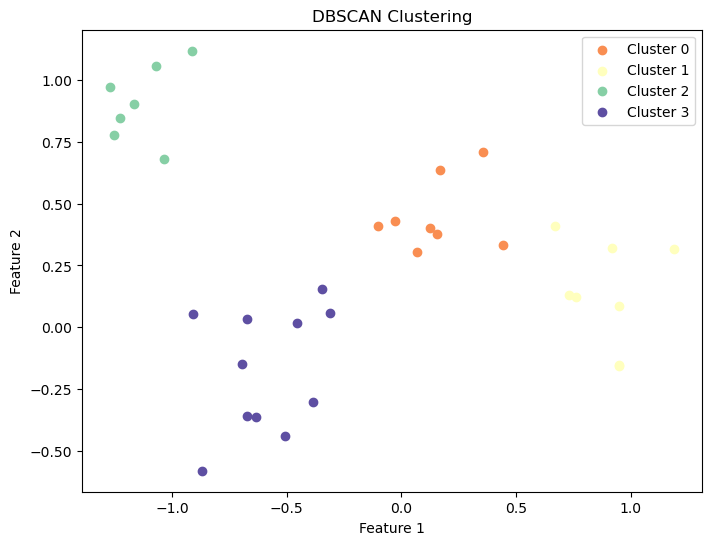

In [37]:
plt.figure(figsize=(8, 6))
unique_labels = np.unique(dbscan_labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for label, col in zip(unique_labels, colors):
    if label != -1:  # Skip noise points
        class_member_mask = (dbscan_labels == label)
        xy = X[class_member_mask]
        plt.scatter(xy[:, 0], xy[:, 1], c=np.array([col]), label=f'Cluster {label}')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [39]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from scipy.io import arff

In [41]:
os.environ["OMP_NUM_THREADS"] = "2"

In [43]:
data, meta = arff.loadarff('compound.arff')

In [45]:
df = pd.DataFrame(data)


In [47]:
df['x'] = df['x'].astype(float)
df['y'] = df['y'].astype(float)


In [57]:
X = np.array([[row[0], row[1]] for row in data])


In [59]:
dbscan = DBSCAN(eps=0.3, min_samples=10)
dbscan_labels = dbscan.fit_predict(X)

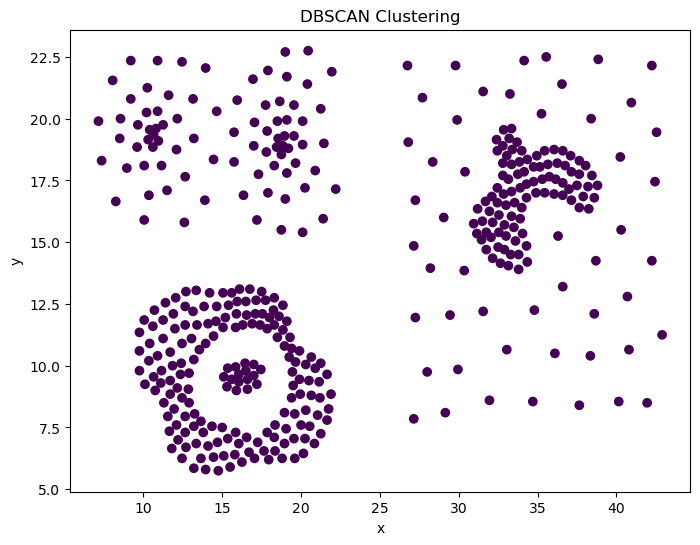

In [61]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('x')
plt.ylabel('y')
plt.show()